In [1]:
import pandas as pd
import numpy as np
import patsy as pt
%pylab inline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from patsy import dmatrices
from subprocess import check_call


#code link: https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Import the data :
df = pd.read_csv('~/Desktop/Churn_Modelling.csv',error_bad_lines=False)
print(len(df))
df.columns
df.iloc[:5]

10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# One Hot Encoding
df1 = pd.get_dummies(df.iloc[:,3:14])
df1.iloc[:5]


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [6]:
# Extract features and labels

labels=df1['Exited']
# Training and Testing Sets
df1 = df1.drop('Exited', axis = 1)
train, test, train_labels, test_labels = train_test_split(df1,labels, test_size = 0.3, random_state = 11)




In [7]:
#create test data set :

test_df=test.merge(test_labels, right_index=True,left_index=True)
test_df[:10]


rf_exp = RandomForestClassifier(n_estimators= 1000,bootstrap = True, random_state=100)
rf_exp.fit(train, train_labels)
#print rf_exp

#export_graphviz(rf_exp.estimators_[0], feature_names=train.columns,filled=True,rounded=True)
#os.system('dot -Tpng tree.dot -o tree.png')

#(graph,) = pydot.graph_from_dot_file('tree_churn.dot')
#graph.write_png('tree_churn.png')



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [10]:
# Make predictions on test data
predictions = rf_exp.predict(test)

train_rf_probs = rf_exp.predict_proba(test)[:, 1]



## Confusion Matrix

cm = confusion_matrix(test_labels, predictions)
cm


accuracy = (cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print("The model accuracy is :", round((accuracy*100),2), " %")

print(cm)



The model accuracy is : 86.03  %
[[2287   88]
 [ 331  294]]


In [11]:
importances = list(rf_exp.feature_importances_)

col_list = list(df1.columns)


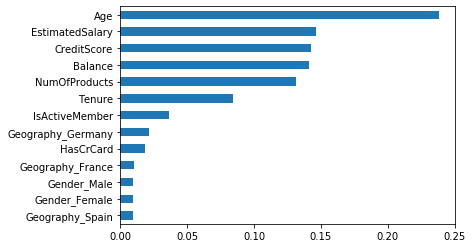

In [12]:
feat_importances = pd.Series(rf_exp.feature_importances_, index=train.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')

In [13]:
feat_importances

CreditScore          0.142733
Age                  0.238420
Tenure               0.084316
Balance              0.141257
NumOfProducts        0.131601
HasCrCard            0.018606
IsActiveMember       0.036155
EstimatedSalary      0.146168
Geography_France     0.010397
Geography_Germany    0.021414
Geography_Spain      0.009612
Gender_Female        0.009636
Gender_Male          0.009685
dtype: float64

In [14]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df1, round(importance, 2)) for df1, importance in zip(col_list, importances)]

feature_importances

[('CreditScore', 0.14),
 ('Age', 0.24),
 ('Tenure', 0.08),
 ('Balance', 0.14),
 ('NumOfProducts', 0.13),
 ('HasCrCard', 0.02),
 ('IsActiveMember', 0.04),
 ('EstimatedSalary', 0.15),
 ('Geography_France', 0.01),
 ('Geography_Germany', 0.02),
 ('Geography_Spain', 0.01),
 ('Gender_Female', 0.01),
 ('Gender_Male', 0.01)]

###### Important Variables :
Credit Score , Age , Estimated Salary Balance and Number of Bank Products used are important features while deciding the probability of a customer getting churned 